# Tutorial for Hopfield network and `Hopfield` module

## Introduction

This tutorial provides a brief overview of the Hopfield network and demonstrates how to use the Hopfield module to implement this type of neural network.
The Hopfield network is a recurrent neural network that is often used for associative memory tasks.
It can store patterns and recall them even when provided with noisy or incomplete input data.

**Note:** This tutorial was created with the assistance of ChatGPT.


### What is a Hopfield Network?

A Hopfield network is a type of artificial neural network used for associative memory tasks.
It is capable of storing patterns and recalling them even when presented with noisy or incomplete input.
The network mimics how the brain recalls memories by iteratively updating neurons based on their interactions with other neurons.


## Using the Hopfield Class

### Step 1: Import the HopfieldVis class

First, we need to import the `HopfieldVis` class from the `Hopfield` module.

In [2]:
import sys
import os
sys.path.append('.')

current_dir = os.getcwd()

if 'google.colab' in sys.modules:
    !git clone https://github.com/skrbcr/Hopfield_network_gpu.git
    %cd Hopfield_network_gpu
    sys.path.append('/content/Hopfield_network_gpu/')
    current_dir += '/Hopfield_network_gpu'
else:
    sys.path.append(os.path.dirname(current_dir))

from Hopfield import HopfieldVis

### Step 2: Initialize the associative memory

We initialize the associative memory with an image, number of patterns, and initial overlap.
You can adjust the parameters `p` (number of patterns to memorize) and `seed` (random seed) as needed.

In [3]:
hopfield = HopfieldVis(image_name=f"{current_dir}/github.png", p=1000)

### Step 3: Memorize the pattern

The `memorize` method memorizes the input pattern using a synaptic matrix `J` generated from the input patterns.

**Mathematical Principle Behind Memorization**

In the Hopfield network, the synaptic matrix $J$ is calculated based on the input patterns. This matrix is defined as:
$$
J_{ij} = \frac{1}{N} \sum_{\mu = 1}^{p} \xi_i^\mu \xi_j^\mu
$$
where $\xi_i^\mu$ represents the state of neuron $i$ in the $\mu$-th pattern.
For instance, for monochromatic image, 
$$
\xi_i^\mu = 
\begin{cases}
    1  & \text{if $i$-th pixel is white} \\
    -1 & \text{if $i$-th pixel is black}
\end{cases}
$$

This equation allows the network to store the patterns by adjusting the interactions between neurons.


In [4]:
hopfield.memorize()

### Step 4: Recall the pattern

The `recall` method simulates the Hopfield network dynamics to recall the pattern.
You can adjust the parameters `m0` (initial overlap), `delta_m` (convergence threshold), `max_steps` (maximum recall steps).

It stores the states of the network and the overlap `m` at each step.

**Mathematical Principle Behind Recall**

During the recall process, the state of each neuron is updated according to the following rule:
$$
S_i(t + \Delta t) = \mathrm{sgn}\left(\sum_{j = 1}^{N} J_{ij}S_j(t)\right)
$$
This update rule ensures that the network converges towards one of the stored patterns, even if the initial input is noisy or incomplete.

How much the state of neuron is simillar to the image pattern is described as overlap `m`:

$$
m = \frac{1}{N} \sum_{i=1}^{N} \xi_i S_i
$$
where $S_i$ is the state of neuron $i$.

In [5]:
hopfield.recall(m0=0.7)

### Step 5: Plot the overlap m

The `plot_m` method plots the overlap `m` as a function of the recall steps.
You can save the plot by specifying a `save_name`.

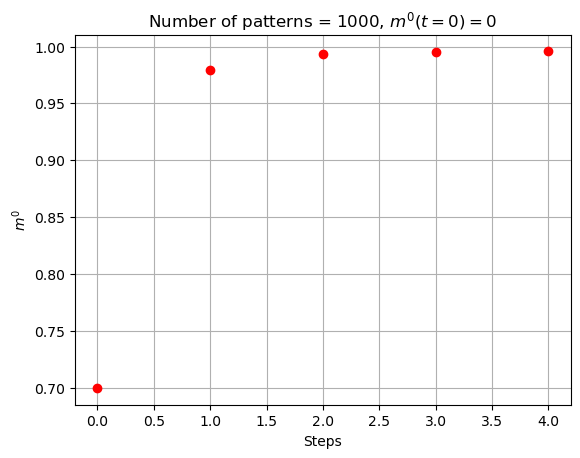

In [6]:
hopfield.plot_m(save_name="tutorial_plot_m.png")

You should find that the overlap `m` convergence to 1.
This means that the original image is restored.

### Step 6: Save the recall process as a video

The `save_video` method saves the recall process as a video.
You can specify the output video name and the output size (default is 1920 x 1080).

In [7]:
hopfield.save_video(output_name="turorial_recall_video.mp4", output_size=(1280, 720))

### Step 7: Free the GPU memory (Optional)

Finally, the `free` method releases all resources held by the class and resets its state.
Because all the memory will be released when you close the notebook or the program is completed, this is not necessary.
Please run this when the GPU memory (VRAM) is full up and you want to release them.

If the return is (0, 0, 0), VRAM is freed normally.

In [8]:
hopfield.free()

(0, 0, 0)

## Conclusion

This notebook provided a step-by-step guide on how to use the `HopfieldVis` class for associative memory tasks.
The behavior of Hopfield network mainly depends on the number of storing patterns `p`, the data (image) size and initial overlap `m0`.
You can experiment with different images, parameters, and settings to explore.

Have fun!